PATH CALCULATOR

[[0.         0.         0.        ]
 [1.         1.         1.        ]
 [1.16618076 1.16618076 1.16618076]
 [1.59475219 1.59475219 1.59475219]
 [2.18075802 2.18075802 2.18075802]
 [2.81924198 2.81924198 2.81924198]
 [3.40524781 3.40524781 3.40524781]
 [3.83381924 3.83381924 3.83381924]
 [4.         4.         4.        ]]
[[ 0.          0.          0.        ]
 [ 0.         -0.15591727  0.64052231]
 [ 0.78539816  0.6424904   0.5843739 ]
 [ 0.78539816  0.65957346  0.5118173 ]
 [ 0.78539816  0.61422603  0.7075343 ]
 [ 0.78539816  0.48139266  1.41928388]
 [ 0.78539816  0.62756306  0.64887343]
 [ 0.78539816  0.60271517  0.75907891]
 [ 0.78539816  0.59961148  0.77313925]
 [ 0.78539816  0.59901417  0.77585358]]


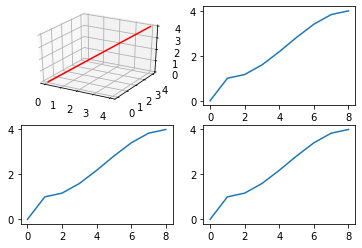

In [ ]:

import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
ini=np.array([1,1,1])
f=np.array([3,3,3])
tf=7
ax0=ini[0]
ay0=ini[1]
az0=ini[2]
ax1=0
ay1=0
az1=0

#X=np.array([ax2,ax3,ay2,ay3,az2,az3])
A=np.array([[tf**2,tf**3,0,0,0,0],[0,0,tf**2,tf**3,0,0],[0,0,0,0,tf**2,tf**3],[2*tf,3*tf**2,0,0,0,0],[0,0,2*tf,3*tf**2,0,0],[0,0,0,0,2*tf,3*tf**2]])
K=np.array([f[0],f[1],f[2],0,0,0])
invA=np.linalg.inv(A)
X=invA@K

ax2=X[0]
ax3=X[1]
ay2=X[2]
ay3=X[3]
az2=X[4]
az3=X[5]
Aa=np.array([[ax0,ax1,ax2,ax3],[ay0,ay1,ay2,ay3],[az0,az1,az2,az3]])
arr = np.array([[1,2,3],[4,5,6]])

#PATH calculator
def pathfunc(tf,Aa,arr):
  t=0
  for t in range (tf+1):
    T=np.array([1,t,t**2,t**3])

    
    row=Aa@T

    arr = np.vstack([arr,row])

  return arr

arr = np.array([[0,0,0]])
arr1 =pathfunc(tf,Aa,arr) #here we get all the points of trajectory
print(arr1)

#inverse kinematics

def invkine(arr1,J):
  for i in range(len(arr1)):
    x=[0]*3;
    x=arr1[i];
    d1=1;
    d2=3;
    d3=1;
    k=x[0]**2+x[1]**2
    r = abs((k+(x[2]-d1)**2-d2**2-d3**2)/(2*d2*d3))
    theta1 = np.arctan2(x[1],x[0])
    theta3 = np.arctan2(np.sqrt(abs(1-r**2)),r)
    theta2 = np.arctan2(x[1],x[0]) - np.arctan2((d3*np.sin(theta3)),(d2+d3*np.cos(theta3)))
    
    s=np.array([theta1,theta2,theta3])
    J=np.vstack([J,s])
  return J

    
J=np.array([[0,0,0]])
arr2=invkine(arr1,J) #here we get all the JOINT VAR of trajectory
print(arr2)
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr1 ],[s[1] for s in arr1 ],[s[2] for s in arr1 ]]
ax.plot3D(X[0],X[1],X[2],'r')

t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])


plt.show()


**The 3D is the xyz PLOT and others are X,y,z vs t plot respectively**

In [ ]:
arr2[:,2]

array([0.        , 0.64052231, 0.5843739 , 0.5118173 , 0.7075343 ,
       1.41928388, 0.64887343, 0.75907891, 0.77313925, 0.77585358])

**JC AND JW CALCULATOR**

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1



sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2 l3')
k1=sym.Matrix([q1,q2,q3])
k2=sym.Matrix([q1dot,q2dot,q3dot])
k3=sym.Matrix([q1ddot,q2ddot,q3ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])
M=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);
A1=sym.Matrix([[sym.cos(q1),-sym.sin(q1),0,0],[sym.sin(q1),sym.cos(q1),0,0],[0,0,1,l1],[0,0,0,1]]);

A2=sym.Matrix([[sym.cos(q2),0,-sym.sin(q2),0],[sym.sin(q2),0,sym.cos(q2),0],[0,-1,0,l2],[0,0,0,1]]);
A3=sym.Matrix([[sym.cos(q3),-sym.sin(q3),0,l3*sym.cos(q1)],[sym.sin(q3),sym.cos(q3),0,l3*sym.sin(q3)],[0,0,1,0],[0,0,0,1]]);



sym.simplify(A1*A2*A3)

⎡cos(q₃)⋅cos(q₁ + q₂)  -sin(q₃)⋅cos(q₁ + q₂)  -sin(q₁ + q₂)  l₃⋅cos(q₁)⋅cos(q₁
⎢                                                                             
⎢sin(q₁ + q₂)⋅cos(q₃)  -sin(q₃)⋅sin(q₁ + q₂)  cos(q₁ + q₂)   l₃⋅sin(q₁ + q₂)⋅c
⎢                                                                             
⎢      -sin(q₃)              -cos(q₃)               0         l₁ + l₂ - l₃⋅sin
⎢                                                                             
⎣         0                      0                  0                   1     

 + q₂)⎤
      ⎥
os(q₁)⎥
      ⎥
(q₃)  ⎥
      ⎥
      ⎦

**Symbolic Jacobian Calculator**

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1
l1=2
l2=2


sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot q3dot q1ddot q2ddot q3ddot T1 T2 F mG l1 l2 l3')
k1=sym.Matrix([q1,q2,q3])
k2=sym.Matrix([q1dot,q2dot,q3dot])
k3=sym.Matrix([q1ddot,q2ddot,q3ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])


Z0=sym.Matrix([[0],[0],[1]]);
Z1=sym.Matrix([[0],[0],[1]]);
Z2=sym.Matrix([[-sym.sin(q1+q2)],[sym.cos(q1+q2)],[0]]);
O3=sym.Matrix([[l3*sym.cos(q1)*sym.cos(q1+q2)],[l3*sym.cos(q1)*sym.sin(q1+q2)],[l1+l2-l3*sym.sin(q3)]])
O2=sym.Matrix([[0],[0],[l1+l2]])
O1=sym.Matrix([[0],[0],[l1]])
O0=sym.Matrix([[0],[0],[0]])

sym.simplify(Z0.cross(O3-O0)),sym.simplify(Z1.cross(O3-O1)),sym.simplify(Z2.cross(O3-O2))

⎛⎡-l₃⋅sin(q₁ + q₂)⋅cos(q₁)⎤  ⎡-l₃⋅sin(q₁ + q₂)⋅cos(q₁)⎤  ⎡-l₃⋅sin(q₃)⋅cos(q₁ +
⎜⎢                        ⎥  ⎢                        ⎥  ⎢                    
⎜⎢l₃⋅cos(q₁)⋅cos(q₁ + q₂) ⎥, ⎢l₃⋅cos(q₁)⋅cos(q₁ + q₂) ⎥, ⎢-l₃⋅sin(q₃)⋅sin(q₁ +
⎜⎢                        ⎥  ⎢                        ⎥  ⎢                    
⎝⎣           0            ⎦  ⎣           0            ⎦  ⎣      -l₃⋅cos(q₁)   

 q₂)⎤⎞
    ⎥⎟
 q₂)⎥⎟
    ⎥⎟
    ⎦⎠

Q1DDOT Q2DDOT Q3DDOT CALCULATOR

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1
l1=2
l2=2
l3=2
#I1+I2 I2
#I2 I2
i1=1
i2=1
i3=1
m1g=1
m2g=1
m3g=1
sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,T3,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot q3dot q1ddot q2ddot q3ddot T1 T2 T3 mG l1 l2 l3')
k1=sym.Matrix([q1,q2,q3])
k2=sym.Matrix([q1dot,q2dot,q3dot])
k3=sym.Matrix([q1ddot,q2ddot,q3ddot])
VQ=m1g*l1/2+m2g*(l1)+m2g*(l2/2)*sym.sin(q2)+m3g*(l1+l2+l3/2)*sym.sin(q3+q2)
X1=sym.diff(VQ,q1)
X2=sym.diff(VQ,q2)
X3=sym.diff(VQ,q3)
GQ=sym.Matrix([X1,X2,X3])
tau=sym.Matrix([T1,T2,T3])
M=sym.Matrix([[0,0,0],[0,0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[0,0,0],[0,0,0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l3*sym.sin(q1+q2)*sym.cos(q1),(l2-l3*sym.sin(q3))*sym.cos(q1+q2),-l3*sym.sin(q3)*cos(q1+q2)],[l3*sym.cos(q1+q2)*sym.cos(q1),(l2-l3*sym.sin(q3))*sym.sin(q1+q2),-l3*sym.sin(q3)*sin(q1+q2)],[0,-l3*sym.cos(q1),-l3*sym.cos(q1)]]);
Z=O.T
#FOR ROTATIONAL ENERGY CALCULATION
M1=sym.Matrix([[0,0,0],[0,0,0],[1,0,0]]);
X1=M1.T
N1=sym.Matrix([[0,-sym.sin(q1+q2),-sym.sin(q1+q2)],[0,sym.cos(q1+q2),sym.cos(q1+q2)],[1,0,0]]);
Y1=N1.T
O1=sym.Matrix([[0,-sym.sin(q1+q2),-sym.sin(q1+q2)],[0,sym.cos(q1+q2),sym.cos(q1+q2)],[1,0,0]]);
Z1=O1.T
I=sym.Matrix([[i1,0,0],[0,i2,0],[0,0,i3]])

DQ0=sym.simplify(X*M)+sym.simplify(Y*N)+sym.simplify(Z*O)
DQ1=(sym.simplify(X1*M1)+sym.simplify(Y1*N1)+sym.simplify(Z1*O1))*I
DQ=DQ0+DQ1
no1=3

CQQD= sym.Matrix([[0,0,0],[0,0,0],[0,0,0]])

#Cqqd CALCULATOR
for k in range(no1):
    for j in range(no1):
        su=0
        for i in range(no1):
            su+=(0.5*(sym.diff(DQ[k,j],k1[i]) + sym.diff(DQ[k,i],k1[j])-sym.diff(DQ[i,j],k1[k])))*k2[i]
            
        CQQD[k,j]=su
        
        

difF=sym.simplify(DQ.inv()*(CQQD*(k2)+GQ-tau))
difF

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢             ⎛    2    2         2    2         2    ⎞ ⎛                     
⎢           - ⎝- l₃ ⋅sin (q₁) + l₃ ⋅sin (q₃) + l₃  + 2⎠⋅⎝2.0⋅T₂ - 2.0⋅l₁⋅cos(q
⎢           ──────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢  ⎛         2                            2         

In [ ]:
from sympy.printing.pycode import pycode
pycode(difF[2])

'(1/2)*(-(2*T3 + l3**2*q1dot*(q2dot + q3dot)*math.sin(2*q1) + l3**2*q3dot*(q1dot*math.sin(2*q1) - q3dot*math.sin(2*q3)) + l3*q2dot*(l3*q1dot*math.sin(2*q1) - 2*q2dot*(l2 - l3*math.sin(q3))*math.cos(q3)) - (2*l1 + 2*l2 + l3)*math.cos(q2 + q3))*(l2**2 - 2*l2*l3*math.sin(q3) - l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2) + (-l2*l3*math.sin(q3) - l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2)*(2.0*T2 - 2.0*l1*math.cos(q2 + q3) + 4.0*l2*l3*q2dot*q3dot*math.cos(q3) + 2.0*l2*l3*q3dot**2*math.cos(q3) - 1.0*l2*math.cos(q2) - 2.0*l2*math.cos(q2 + q3) + 2.0*l3**2*q1dot*q2dot*math.sin(2*q1) + 2.0*l3**2*q1dot*q3dot*math.sin(2*q1) - 2.0*l3**2*q2dot*q3dot*math.sin(2*q3) - 2.0*l3**2*q3dot**2*math.sin(2*q3) - 1.0*l3*math.cos(q2 + q3)))/(l2**2*(l3**2*math.cos(q1)**2 + 2))'

**FINAL EQN SOLVER WITH PI IMPLEMENTATION**

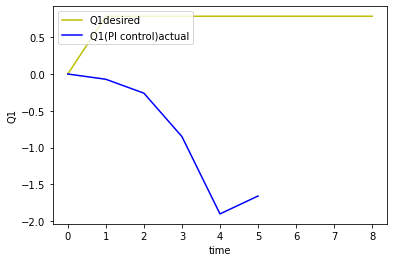

In [ ]:
import sympy as sym
import math as math
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
'''def model(z,t):
  dq1dt=sym.diff(q1)
  dq2dt=sym.diff(q2)
  dzdt=sym.diff(d4)
  dq1ddt=r[0]
  dq2ddt=r[1]
  dzddt=r[2]
  dzdt=[dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dzdt

z0 = [0,0]
t=np.linspace(0,5)
z=odeint(model,z0,t)'''
l1=1
l2=1
l3=1
mG=1
E1=[]
E2=[]
E3=[]
T=[]
Q1=np.array([0.        , 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816])
Q2=np.array([ -0.15591727,  0.6424904 ,  0.65957346,  0.61422603,
        0.48139266,  0.62756306,  0.60271517,  0.59961148,  0.59901417])
Q3=np.array([  0.64052231, 0.5843739 , 0.5118173 , 0.7075343 ,
       1.41928388, 0.64887343, 0.75907891, 0.77313925, 0.77585358])

def Model(t, y):

      KP1=0.8
      KI1=0.1003
      KP2=0.6
      KI2=5
      KP3=1.3
      KI3=8
      q1=y[0]
      q2=y[1]
      q3=y[2]
      
      q1dot=y[3]
      q2dot=y[4]
      q3dot=y[5]
      dq1dt=q1dot
      dq2dt=q2dot
      dq3dt=q3dot
      T.append(t)
   
      n=round(t)
      if(t<=n+1):
        e1=(Q1[n-1]-q1)
        e2=(Q2[n-1]-q2)
        e3=(Q3[n-1]-q3)
      else:
        n=n+1
        e1=(Q1[n]-q1)
        e2=(Q2[n]-q2)
        e3=(Q3[n]-d4)
   
      E1.append(e1)
      E2.append(e2)
      E3.append(e3)
      s1=0
      s2=0
      s3=0

      if(t>2):
          for i in range(7):
              s1=s1+ (E1[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
              s2=s2+ (E2[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
              s3=s3+ (E3[-(1+i)])*(T[-(1+i)]-T[-(2+i)])

      T1=KP1*(e1)+KI1*(s1)
    #print(T1)
      T2=KP2*(e2)+KI2*(s2)
      T3=KP3*(e3)+KI3*(s3)

      l1=1
      l2=1
      l3=1
    
      len(Q1)
    
      dq1ddt=(-T1 - 0.5*l3**2*q1dot**2*math.sin(2*q1) + 0.5*l3**2*q2dot*(q2dot + q3dot)*math.sin(2*q1) + 0.5*l3**2*q3dot*(q2dot + q3dot)*math.sin(2*q1))/(l3**2*math.cos(q1)**2 + 3)
      dq2ddt=(1/2)*(-(-l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2)*(2.0*T2 - 2.0*l1*math.cos(q2 + q3) + 4.0*l2*l3*q2dot*q3dot*math.cos(q3) + 2.0*l2*l3*q3dot**2*math.cos(q3) - 1.0*l2*math.cos(q2) - 2.0*l2*math.cos(q2 + q3) + 2.0*l3**2*q1dot*q2dot*math.sin(2*q1) + 2.0*l3**2*q1dot*q3dot*math.sin(2*q1) - 2.0*l3**2*q2dot*q3dot*math.sin(2*q3) - 2.0*l3**2*q3dot**2*math.sin(2*q3) - 1.0*l3*math.cos(q2 + q3)) + (2*T3 + l3**2*q1dot*(q2dot + q3dot)*math.sin(2*q1) + l3**2*q3dot*(q1dot*math.sin(2*q1) - q3dot*math.sin(2*q3)) + l3*q2dot*(l3*q1dot*math.sin(2*q1) - 2*q2dot*(l2 - l3*math.sin(q3))*math.cos(q3)) - (2*l1 + 2*l2 + l3)*math.cos(q2 + q3))*(-l2*l3*math.sin(q3) - l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2))/(l2**2*(l3**2*math.cos(q1)**2 + 2))
      dq3ddt= (1/2)*(-(2*T3 + l3**2*q1dot*(q2dot + q3dot)*math.sin(2*q1) + l3**2*q3dot*(q1dot*math.sin(2*q1) - q3dot*math.sin(2*q3)) + l3*q2dot*(l3*q1dot*math.sin(2*q1) - 2*q2dot*(l2 - l3*math.sin(q3))*math.cos(q3)) - (2*l1 + 2*l2 + l3)*math.cos(q2 + q3))*(l2**2 - 2*l2*l3*math.sin(q3) - l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2) + (-l2*l3*math.sin(q3) - l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2)*(2.0*T2 - 2.0*l1*math.cos(q2 + q3) + 4.0*l2*l3*q2dot*q3dot*math.cos(q3) + 2.0*l2*l3*q3dot**2*math.cos(q3) - 1.0*l2*math.cos(q2) - 2.0*l2*math.cos(q2 + q3) + 2.0*l3**2*q1dot*q2dot*math.sin(2*q1) + 2.0*l3**2*q1dot*q3dot*math.sin(2*q1) - 2.0*l3**2*q2dot*q3dot*math.sin(2*q3) - 2.0*l3**2*q3dot**2*math.sin(2*q3) - 1.0*l3*math.cos(q2 + q3)))/(l2**2*(l3**2*math.cos(q1)**2 + 2))
      dydt = [dq1dt,dq2dt,dq3dt,dq1ddt,dq2ddt,dq3ddt]
      return dydt



initstate = np.array([Q1[0],Q2[0],Q3[0],0,0,0]) # initial states
timestep = 1

time = np.linspace(0,7,7) # define the time for which we want to solve


# solve the ODE. solve_ivp is the most recent version of the solver. Check docs for more information on how to use.
solution = solve_ivp(Model,[0, time[-1]], initstate, t_eval= time) 
Q1n=solution.y[0]
Q2n=solution.y[1]
Q3n=solution.y[2]
Q1DOT=solution.y[3]
Q2DOT=solution.y[4]
Q3DOT=solution.y[5]
plt.plot(Q1,'y')
plt.plot(Q1n,'b')
plt.xlabel('time')
plt.ylabel('Q1')
plt.legend(["Q1desired", "Q1(PI control)actual"], loc ="upper left")



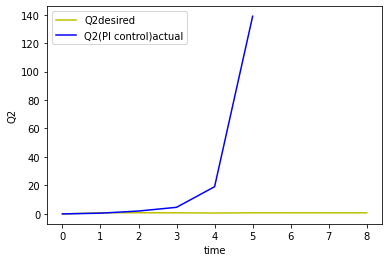

In [ ]:
plt.plot(Q2,'y')
plt.plot(Q2n,'b')
plt.xlabel('time')
plt.ylabel('Q2')
plt.legend(["Q2desired", "Q2(PI control)actual"], loc ="upper left")

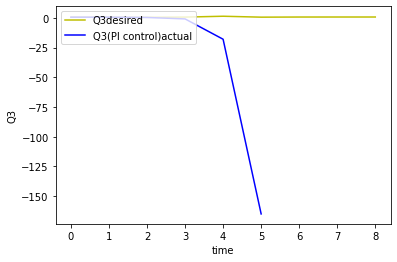

In [ ]:
plt.plot(Q3,'y')
plt.plot(Q3n,'b')
plt.xlabel('time')
plt.ylabel('Q3')
plt.legend(["Q3desired", "Q3(PI control)actual"], loc ="upper left")

**DDOT-2C VERIFIER AND CALCULATOR**

In [ ]:
from sympy.physics.vector import dynamicsymbols
from sympy import diff, Symbol
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1
l1=2
l2=2
l3=2
#I1+I2 I2
#I2 I2
i1=1
i2=1
i3=1
m1g=1
m2g=1
m3g=1
sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,T3,mG,t = sym.symbols('q1 q2 q3 q1dot q2dot q3dot q1ddot q2ddot q3ddot T1 T2 T3 mG t')
q1,q2,q3,q1dot,q2dot,q3dot = dynamicsymbols('q1,q2,q3,q1dot,q2dot,q3dot')

k1=sym.Matrix([q1,q2,q3])
k2=sym.Matrix([diff(q1,t),diff(q2,t),diff(q3,t)])
k3=sym.Matrix([q1ddot,q2ddot,q3ddot])
VQ=m1g*l1/2+m2g*(l1)+m2g*(l2/2)*sym.sin(q2)+m3g*(l1+l2+l3/2)*sym.sin(q3+q2)
X1=sym.diff(VQ,q1)
X2=sym.diff(VQ,q2)
X3=sym.diff(VQ,q3)
GQ=sym.Matrix([X1,X2,X3])
tau=sym.Matrix([T1,T2,T3])
M=sym.Matrix([[0,0,0],[0,0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[0,0,0],[0,0,0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l3*sym.sin(q1+q2)*sym.cos(q1),(l2-l3*sym.sin(q3))*sym.cos(q1+q2),-l3*sym.sin(q3)*cos(q1+q2)],[l3*sym.cos(q1+q2)*sym.cos(q1),(l2-l3*sym.sin(q3))*sym.sin(q1+q2),-l3*sym.sin(q3)*sin(q1+q2)],[0,-l3*sym.cos(q1),-l3*sym.cos(q1)]]);
Z=O.T
#FOR ROTATIONAL ENERGY CALCULATION
M1=sym.Matrix([[0,0,0],[0,0,0],[1,0,0]]);
X1=M1.T
N1=sym.Matrix([[0,-sym.sin(q1+q2),-sym.sin(q1+q2)],[0,sym.cos(q1+q2),sym.cos(q1+q2)],[1,0,0]]);
Y1=N1.T
O1=sym.Matrix([[0,-sym.sin(q1+q2),-sym.sin(q1+q2)],[0,sym.cos(q1+q2),sym.cos(q1+q2)],[1,0,0]]);
Z1=O1.T

I=sym.Matrix([[i1,0,0],[0,i2,0],[0,0,i3]])

DQ0=sym.simplify(X*M)+sym.simplify(Y*N)+sym.simplify(Z*O)
DQ1=(sym.simplify(X1*M1)+sym.simplify(Y1*N1)+sym.simplify(Z1*O1))*I
DQ=DQ0+DQ1
no1=3

CQQD= sym.Matrix([[0,0,0],[0,0,0],[0,0,0]])

#Cqqd CALCULATOR
for k in range(no1):
    for j in range(no1):
        su=0
        for i in range(no1):
            su+=((-sym.diff(DQ[k,i],k1[j])+sym.diff(DQ[i,j],k1[k])))*k2[i]
            
        CQQD[k,j]=su
        
        

difF=sym.simplify(DQ.inv()*(CQQD*(k2)+GQ-tau))
CQQD


⎡                                                                             
⎢                                  0                                          
⎢                                                                             
⎢                                                                             
⎢                        d                                   d                
⎢8⋅sin(q₁(t))⋅cos(q₁(t))⋅──(q₂(t)) + 8⋅sin(q₁(t))⋅cos(q₁(t))⋅──(q₃(t))        
⎢                        dt                                  dt               
⎢                                                                             
⎢                        d                                   d                
⎢8⋅sin(q₁(t))⋅cos(q₁(t))⋅──(q₂(t)) + 8⋅sin(q₁(t))⋅cos(q₁(t))⋅──(q₃(t))  (8⋅sin
⎣                        dt                                  dt               

                                    d                                   d     
          - 8⋅sin(q₁(t))⋅cos(q₁(t))⋅──(q₂(t)) - 8⋅s

**DDOT-2C VERIFICATION AS A SKEW SYMMETRIC MATRIX**

In [ ]:
sym.simplify(CQQD)

⎡                                                            ⎛d           d   
⎢                  0                                      -4⋅⎜──(q₂(t)) + ──(q
⎢                                                            ⎝dt          dt  
⎢                                                                             
⎢  ⎛d           d        ⎞                                                    
⎢4⋅⎜──(q₂(t)) + ──(q₃(t))⎟⋅sin(2⋅q₁(t))                                      0
⎢  ⎝dt          dt       ⎠                                                    
⎢                                                                             
⎢  ⎛d           d        ⎞                 ⎛                   d              
⎢4⋅⎜──(q₂(t)) + ──(q₃(t))⎟⋅sin(2⋅q₁(t))  4⋅⎜2⋅(sin(q₃(t)) - 1)⋅──(q₂(t)) + (2⋅
⎣  ⎝dt          dt       ⎠                 ⎝                   dt             

     ⎞                                                      ⎛d           d    
₃(t))⎟⋅sin(2⋅q₁(t))                                